## Q1. What is Ridge Regression, and how does it differ from ordinary least squares regression?

Ridge Regression, also known as Tikhonov regularization or L2 regularization, is a linear regression technique that is used to overcome the problems of multicollinearity in ordinary least squares (OLS) regression. In OLS, when there is multicollinearity (high correlation among predictor variables), the estimates of the regression coefficients become highly sensitive to random errors in the observed data. Ridge Regression introduces a regularization term, often denoted by λ (lambda), which penalizes large coefficients and helps to stabilize and improve the performance of the model.

The Ridge Regression objective function is:

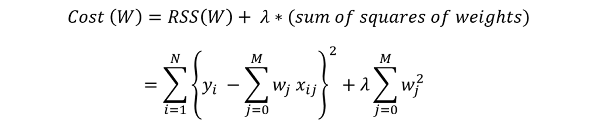

Here, RSS is the residual sum of squares, and the second term is the regularization term, where λ is the tuning parameter that controls the strength of the regularization.

## Q2. What are the assumptions of Ridge Regression?


*Ridge Regression, like ordinary least squares (OLS) regression, relies on certain assumptions to be valid. The main assumptions of Ridge Regression are similar to those of linear regression. Here are the key assumptions:*

- Linearity: Ridge Regression assumes a linear relationship between the independent variables and the dependent variable. The model is formulated as a linear combination of the predictors with coefficients that need to be estimated.

- Independence of Errors: The errors (residuals) in Ridge Regression should be independent of each other. In other words, the value of the error term for one observation should not provide information about the error term for another observation.

- Homoscedasticity: The variance of the errors should be constant across all levels of the independent variables. This means that the spread of residuals should be consistent throughout the range of predicted values.

- Normality of Errors: While Ridge Regression is not as sensitive to this assumption as ordinary least squares, it still assumes that the errors are normally distributed. This assumption is more critical for making statistical inferences and constructing confidence intervals.

- No Perfect Multicollinearity: Ridge Regression assumes that there is no perfect multicollinearity among the independent variables. Perfect multicollinearity occurs when one or more independent variables are perfectly correlated, making it impossible to estimate the unique contribution of each variable.

It's important to note that Ridge Regression is particularly useful when there are issues with multicollinearity in the dataset. The regularization term added to the objective function helps stabilize the estimation of coefficients in the presence of highly correlated predictors.

## Q3. How do you select the value of the tuning parameter (lambda) in Ridge Regression?


#### Selection of Tuning Parameter (λ):
The tuning parameter in Ridge Regression is typically denoted as λ (lambda), and it controls the strength of the regularization. The process of selecting the appropriate value for λ involves finding a balance between fitting the model well to the training data and preventing overfitting. Common approaches for selecting λ include:

- Cross-Validation:

One of the most common methods for tuning λ is cross-validation. The dataset is split into multiple subsets, and the model is trained on different combinations of training and validation sets. The performance of the model is then evaluated on the validation sets for each combination of λ.
Common types of cross-validation include k-fold cross-validation and leave-one-out cross-validation. The value of λ that results in the best performance (e.g., lowest mean squared error) on the validation sets is chosen.

- Grid Search:

A grid search involves specifying a range of possible λ values and systematically trying each one to find the optimal value. This can be computationally intensive but is effective, especially if the range of potential λ values is relatively small.
The grid search can be combined with cross-validation to evaluate the performance of the model for each λ value.

- Regularization Paths:

Some algorithms, such as coordinate descent or gradient descent-based methods, allow you to compute the regularization path, which shows how the coefficients change with varying λ.
By observing how the coefficients evolve, you can identify the region of λ that provides a good balance between fitting the data and regularization.

- Information Criteria:

Information criteria, such as Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC), can be used to select the optimal λ. These criteria balance the goodness of fit and model complexity.
Lower values of AIC or BIC indicate better-fitting models, so you can choose the λ that minimizes these criteria.

- Cross-Validation with a Holdout Set:

In some cases, a holdout set (separate from the training and validation sets used in cross-validation) is kept aside for final model evaluation. The model is trained using cross-validation, and the best λ is chosen based on performance on the validation sets. The model's final evaluation is then performed on the holdout set.

It's important to note that the effectiveness of different methods may vary depending on the specific characteristics of the dataset. **Cross-validation is a widely used and robust technique for hyperparameter tuning in Ridge Regression and other machine learning models.**


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Assuming X_train and y_train are your training data
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}  # alpha is equivalent to lambda

grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_lambda = grid_search.best_params_['alpha']


## Q4. Can Ridge Regression be used for feature selection? If yes, how?


#### Ridge Regression for Feature Selection:
Ridge Regression does not perform variable selection in the same way as some other methods like LASSO (L1 regularization), which can lead coefficients to be exactly zero. However, it can shrink coefficients close to zero, effectively reducing the impact of less important features. It is not a feature selection technique in the strict sense.

## Q5. How does the Ridge Regression model perform in the presence of multicollinearity?


#### Handling Multicollinearity:

Ridge Regression is particularly useful when multicollinearity is present. The regularization term added to the objective function helps to prevent the overfitting caused by high collinearity among predictor variables.

## Q6. Can Ridge Regression handle both categorical and continuous independent variables?


Ridge Regression is primarily designed for numerical (continuous) features, and its formulation assumes that the independent variables are quantitative. When dealing with a mix of categorical and continuous independent variables, additional preprocessing steps are typically needed to handle the categorical features appropriately.

Here are some common approaches to incorporate both categorical and continuous variables when using Ridge Regression:

- One-Hot Encoding for Categorical Variables:

Convert categorical variables into binary (0/1) indicator variables using one-hot encoding. Each category is represented by a binary column, and the Ridge Regression model can then treat them as numerical features.
One-hot encoding creates dummy variables, introducing additional columns equal to the number of categories minus one for each categorical variable.
- Encoding Ordinal Variables:

If the categorical variables are ordinal, meaning they have a meaningful order, you can encode them numerically based on their order. This preserves the ordinal information while allowing Ridge Regression to handle them as continuous variables.
- Scaling Continuous Variables:

Ridge Regression is sensitive to the scale of the input features. It's important to scale continuous variables before applying Ridge Regression to ensure that all features contribute equally to the regularization term.
Common scaling methods include standardization (subtracting the mean and dividing by the standard deviation) or min-max scaling.
- Regularization Parameter (λ):

When using Ridge Regression, the regularization parameter (λ) controls the strength of the penalty term. The optimal value of λ should be determined through techniques like cross-validation, taking into account both the continuous and one-hot encoded categorical features.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Assuming X contains both continuous and categorical variables
# Define which columns are continuous and categorical
continuous_cols = [...]  # List of indices or column names for continuous variables
categorical_cols = [...]  # List of indices or column names for categorical variables

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Create a Ridge Regression model pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Specify the hyperparameter grid for cross-validation
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0]  # Adjust the alpha values as needed
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Access the best Ridge Regression model
best_ridge_model = grid_search.best_estimator_


*In this example, ColumnTransformer is used to apply different preprocessing steps to the continuous and categorical columns. The Ridge Regression model is part of a pipeline that includes the preprocessing steps. The optimal value of the regularization parameter (alpha) is determined through cross-validation*

## Q7. How do you interpret the coefficients of Ridge Regression?


Interpreting the coefficients in Ridge Regression is somewhat different from interpreting coefficients in ordinary least squares (OLS) regression due to the regularization term. In Ridge Regression, the coefficients are influenced not only by the relationship between the predictors and the target variable but also by the penalty applied to keep them from becoming too large. Here are some key points to consider when interpreting the coefficients in Ridge Regression:

- Size and Significance:
As in OLS regression, the sign of the Ridge Regression coefficients indicates the direction of the relationship between the predictor and the target variable.
The magnitude of the coefficients should be considered in relation to the scale of the features. However, in Ridge Regression, the coefficients are shrunk towards zero, and their absolute values may be smaller than in OLS.

- Relative Importance:
The relative importance of predictors can be gauged by comparing the magnitudes of their coefficients. Larger absolute values suggest a stronger impact on the target variable.

- Impact of Regularization:
The regularization term in Ridge Regression tends to shrink coefficients towards zero. Therefore, the coefficients reflect both the original relationship between predictors and the target and the penalty applied to control the size of the coefficients.
Even features with small coefficients may still be important in Ridge Regression, as long as the overall impact of the feature contributes to reducing the objective function (combining the goodness of fit and the regularization term).

- Normalization Effect:
The Ridge Regression coefficients are affected by the scale of the features. It's common practice to standardize or normalize the features before applying Ridge Regression to ensure that all features contribute equally to the regularization term.

- No Exact Zero Coefficients:
Unlike some other regularization techniques (e.g., LASSO), Ridge Regression rarely results in exact zero coefficients. Even features with small coefficients are retained in the model to some extent.

- Interpretation of Dummy Variables (One-Hot Encoded):
If categorical variables are one-hot encoded, the interpretation of coefficients involves comparing each category to the reference category. The coefficients indicate the change in the predicted target variable relative to the reference category.


## Q8. Can Ridge Regression be used for time-series data analysis? If yes, how?

Yes, Ridge Regression can be applied to time-series data analysis, but its use in this context is somewhat nuanced. Time-series data often has temporal dependencies, and traditional Ridge Regression assumes independence of observations. However, with some modifications and considerations, Ridge Regression can still be adapted for time-series analysis. Here are a few ways you can use Ridge Regression for time-series data:

- Lagged Features:

One common approach is to incorporate lagged values of the target variable or lagged features as predictors in the Ridge Regression model. This acknowledges the temporal dependencies in the data.
For example, you might create lagged features such as the value of the target variable at the previous time step (lag 1), two time steps ago (lag 2), and so on.
- Sliding Windows:

Divide the time series into overlapping or non-overlapping windows and create features based on the statistics of each window. These statistics can include mean, standard deviation, and other relevant metrics.
The Ridge Regression model can then be trained on these aggregated features.
- Time-Based Features:

Introduce time-based features that capture the temporal patterns in the data. This could include features like the day of the week, month, or quarter, which may have a cyclical influence on the target variable.
Fourier transformations or other time-based representations might be used to extract periodic components.
- Regularization Parameter Tuning:

When applying Ridge Regression to time-series data, careful consideration should be given to tuning the regularization parameter (λ). This parameter controls the strength of the penalty term and should be selected based on cross-validation or other model selection techniques.
The choice of λ impacts how much the model relies on the historical information contained in lagged features.
- Stationarity:

Ensure that the time series is stationary before applying Ridge Regression. Non-stationary time series may exhibit trends or seasonality that can affect the model's performance. Techniques such as differencing or detrending can be employed.
- Performance Evaluation:

Assess the model's performance using appropriate time-series evaluation metrics, such as mean absolute error (MAE), mean squared error (MSE), or others suitable for your specific application.
Consider using time-series cross-validation techniques to obtain reliable estimates of the model's predictive performance.

It's important to note that while Ridge Regression can be adapted for time-series data, there are other specialized techniques designed specifically for time-series forecasting, such as autoregressive integrated moving average (ARIMA), seasonal decomposition of time series (STL), and machine learning methods like recurrent neural networks (RNNs) or long short-term memory (LSTM) networks. The choice of method depends on the characteristics of the time-series data and the nature of the forecasting task.

In [ ]:
# Assuming time-series data is organized with time dimension
from sklearn.model_selection import TimeSeriesSplit

ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}

time_series_split = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(ridge, param_grid, cv=time_series_split)
grid_search.fit(X_time_series, y_time_series)

best_lambda = grid_search.best_params_['alpha']
